## DSBDAL Assignment 2

## Data Wrangling, II

#### Importing required libraries

In [169]:
import pandas as pd
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

#### Loading the dataset into a dataframe 

In [170]:
data = pd.read_excel('data_academic_performance.xlsx')
data.head()
# Dataset - https://data.mendeley.com/datasets/83tcx8psxv/1
# Information about data - https://www.sciencedirect.com/science/article/pii/S2352340920304315

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,...,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,...,71,93,79,181,180,91,5,4,2,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,...,86,98,78,201,182,92,5,4,4,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,...,18,43,22,113,113,7,1,1,1,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,...,76,80,48,137,157,67,4,3,2,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,...,98,100,71,189,198,98,5,4,4,2


In [171]:
data.drop(data.iloc[:,28:44],inplace=True, axis=1)
data.drop(data.iloc[:,10:25],inplace=True, axis=1)

In [172]:
data.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,MAT_S11,CR_S11,CC_S11,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,71,81,61,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,83,75,66,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,52,49,38,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,56,55,51,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,80,65,76,2


In [173]:
data.shape

(12411, 14)

In [174]:
data.dtypes

COD_S11          object
GENDER           object
EDU_FATHER       object
EDU_MOTHER       object
OCC_FATHER       object
OCC_MOTHER       object
STRATUM          object
SISBEN           object
PEOPLE_HOUSE     object
Unnamed: 9      float64
MAT_S11           int64
CR_S11            int64
CC_S11            int64
SEL_IHE           int64
dtype: object

### Step 1 - Scanning for missing values and inconsistencies

In [175]:
# Unnamed:9 has no data in it, inconsistency in dataset
# Drop the column

data.drop('Unnamed: 9',inplace=True, axis=1)
data.head()

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,MAT_S11,CR_S11,CC_S11,SEL_IHE
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,71,81,61,2
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,83,75,66,4
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,52,49,38,1
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,56,55,51,2
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,80,65,76,2


In [176]:
missing_values_count = data.isnull().sum() ## summing up the null value counts for all columns 
missing_values_count[0:13]

## There are no missing values at first glance

COD_S11         0
GENDER          0
EDU_FATHER      0
EDU_MOTHER      0
OCC_FATHER      0
OCC_MOTHER      0
STRATUM         0
SISBEN          0
PEOPLE_HOUSE    0
MAT_S11         0
CR_S11          0
CC_S11          0
SEL_IHE         0
dtype: int64

In [177]:
for i in data.iloc[:,1:13]:
    print(i)
    print(data[i].value_counts())
    print()
    
## EDU_FATHER, EDU_MOTHER have a "Not sure" entry
## Stratum, SISBEN, PEOPLE_HOUSE,OCC_FATHER, OCC_MOTHER have a "0" entry

GENDER
M    7368
F    5043
Name: GENDER, dtype: int64

EDU_FATHER
Complete professional education          3016
Complete Secundary                       2843
Complete technique or technology         1194
Incomplete Secundary                     1091
Postgraduate education                   1085
Complete primary                          824
Incomplete primary                        735
Incomplete Professional Education         425
Not sure                                  407
0                                         391
Incomplete technical or technological     277
Ninguno                                   123
Name: EDU_FATHER, dtype: int64

EDU_MOTHER
Complete Secundary                       3106
Complete professional education          3059
Complete technique or technology         1495
Incomplete Secundary                     1056
Postgraduate education                    997
Complete primary                          713
Incomplete primary                        541
Incomplete Profes

In [178]:
## Changed 0 occupation to unemployed
data.OCC_FATHER = data.OCC_FATHER.astype(str)
data.OCC_MOTHER = data.OCC_MOTHER.astype(str)
data.OCC_FATHER.replace("0","Home",inplace=True)
data.OCC_MOTHER.replace("0","Home",inplace=True)

## Changed "not sure" entries with the most common educational qualification 
data.EDU_FATHER = data.EDU_FATHER.astype(str)
data.EDU_MOTHER = data.EDU_MOTHER.astype(str)
data.EDU_FATHER.replace("Not sure","Complete professional education",inplace=True)
data.EDU_MOTHER.replace("Not sure","Complete Secundary",inplace=True)
data.EDU_FATHER.replace("0","Zero",inplace=True)
data.EDU_MOTHER.replace("0","Zero",inplace=True)
data.EDU_FATHER.replace("Ninguno","Zero",inplace=True)
data.EDU_MOTHER.replace("Ninguno","Zero",inplace=True)
                               

## Fixed spelling issue 
data.EDU_FATHER.replace("Complete Secundary","Complete Secondary",inplace=True)
data.EDU_FATHER.replace("Incomplete Secundary","Incomplete Secondary",inplace=True)
data.EDU_MOTHER.replace("Complete Secundary","Complete Secondary",inplace=True)
data.EDU_MOTHER.replace("Incomplete Secundary","Incomplete Secondary",inplace=True)

In [179]:
## Replacing SISBEN missing values with the most common classification 
data.SISBEN = data.SISBEN.astype(str)
data.SISBEN.replace("Esta clasificada en otro Level del SISBEN","Level 2",inplace=True)
data.SISBEN.replace("It is not classified by the SISBEN","Level 2",inplace=True)
data.SISBEN.replace("0","Level 2",inplace=True)

## Replacing stratum with the most common stratum
data.STRATUM = data.STRATUM.astype(str)
data.STRATUM.replace("0","Stratum 3",inplace = True)

## Fixing PEOPLE_HOUSE
data.PEOPLE_HOUSE = data.PEOPLE_HOUSE.astype(str)
data.PEOPLE_HOUSE.replace("Nueve","9",inplace = True)
data.PEOPLE_HOUSE.replace("Once","1",inplace = True)
data.PEOPLE_HOUSE.replace("Twelve or more","12",inplace = True)
data.PEOPLE_HOUSE.replace("One","1",inplace = True)
data.PEOPLE_HOUSE.replace("Two","2",inplace = True)
data.PEOPLE_HOUSE.replace("Three","3",inplace = True)
data.PEOPLE_HOUSE.replace("Four","4",inplace = True)
data.PEOPLE_HOUSE.replace("Five","5",inplace = True)
data.PEOPLE_HOUSE.replace("Six","6",inplace = True)
data.PEOPLE_HOUSE.replace("Seven","7",inplace = True)
data.PEOPLE_HOUSE.replace("Eight","8",inplace = True)
data.PEOPLE_HOUSE.replace("Ten","10",inplace = True)
data.PEOPLE_HOUSE.replace("Eleven","11",inplace = True)
data.PEOPLE_HOUSE.replace("0","4",inplace = True)
data.PEOPLE_HOUSE = data.PEOPLE_HOUSE.astype(int)

In [180]:
for i in data.iloc[:,1:13]:
    print(i)
    print(data[i].value_counts())
    print()
    

GENDER
M    7368
F    5043
Name: GENDER, dtype: int64

EDU_FATHER
Complete professional education          3423
Complete Secondary                       2843
Complete technique or technology         1194
Incomplete Secondary                     1091
Postgraduate education                   1085
Complete primary                          824
Incomplete primary                        735
Zero                                      514
Incomplete Professional Education         425
Incomplete technical or technological     277
Name: EDU_FATHER, dtype: int64

EDU_MOTHER
Complete Secondary                       3285
Complete professional education          3059
Complete technique or technology         1495
Incomplete Secondary                     1056
Postgraduate education                    997
Complete primary                          713
Incomplete primary                        541
Incomplete Professional Education         502
Zero                                      422
Incomplete techni

### Step 2 - Scanning for outliers

#### For column MAT_S11

<AxesSubplot:xlabel='MAT_S11'>

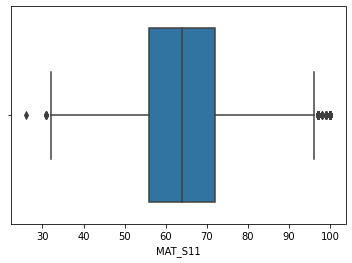

In [181]:
sns.boxplot(x=data['MAT_S11'])

In [182]:
boundary_high1 = data['MAT_S11'].mean() + 2*data['MAT_S11'].std()
boundary_low1 = data['MAT_S11'].mean() - 2*data['MAT_S11'].std()

#### For column CR_S11

<AxesSubplot:xlabel='CR_S11'>

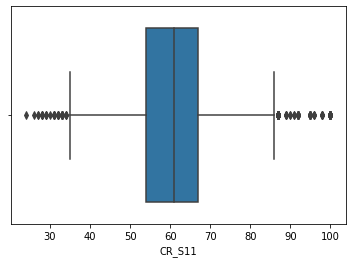

In [183]:
sns.boxplot(x=data['CR_S11'])

In [184]:
boundary_high2 = data['CR_S11'].mean() + 2*data['CR_S11'].std()
boundary_low2 = data['CR_S11'].mean() - 2*data['CR_S11'].std()

#### For column CC_S11

<AxesSubplot:xlabel='CC_S11'>

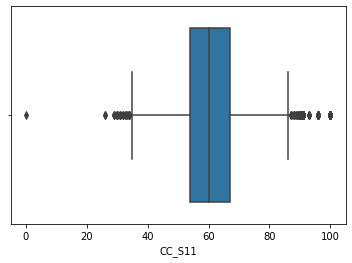

In [185]:
sns.boxplot(x=data['CC_S11'])

In [186]:
boundary_high3 = data['CC_S11'].mean() + 2*data['CC_S11'].std()
boundary_low3 = data['CC_S11'].mean() - 2*data['CC_S11'].std()

#### For column PEOPLE_HOUSE

<AxesSubplot:xlabel='PEOPLE_HOUSE'>

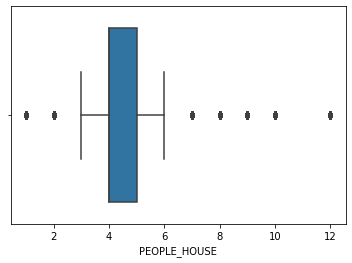

In [187]:
sns.boxplot(x=data['PEOPLE_HOUSE'])

In [188]:
boundary_high4 = data['PEOPLE_HOUSE'].mean() + 2*data['PEOPLE_HOUSE'].std()
boundary_low4 = data['PEOPLE_HOUSE'].mean() - 2*data['PEOPLE_HOUSE'].std()

In [189]:
new_df = data[(data['MAT_S11'] < boundary_high1) & (data['MAT_S11'] > boundary_low1)]
new_df = new_df[(new_df['CR_S11'] < boundary_high2) & (new_df['CR_S11'] > boundary_low2)]
new_df = new_df[(new_df['CC_S11'] < boundary_high3) & (new_df['CC_S11'] > boundary_low3)]
new_df = new_df[(new_df['PEOPLE_HOUSE'] < boundary_high4) & (new_df['PEOPLE_HOUSE'] > boundary_low4)]

In [190]:
data = new_df
data.shape

(10684, 13)

<AxesSubplot:xlabel='MAT_S11'>

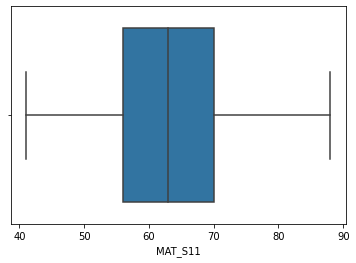

In [191]:
sns.boxplot(x=data['MAT_S11'])

<AxesSubplot:xlabel='CR_S11'>

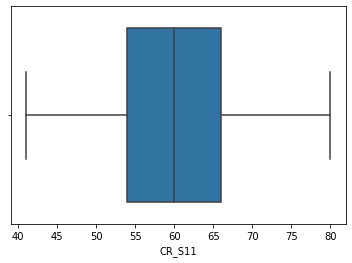

In [192]:
sns.boxplot(x=data['CR_S11'])

<AxesSubplot:xlabel='CC_S11'>

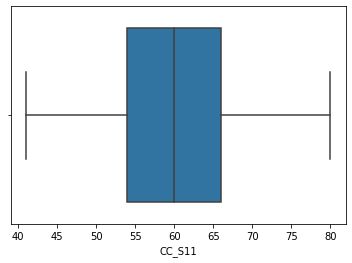

In [193]:
sns.boxplot(x=data['CC_S11'])

<AxesSubplot:xlabel='PEOPLE_HOUSE'>

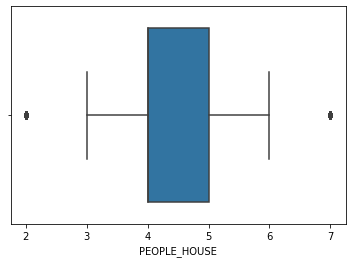

In [194]:
sns.boxplot(x=data['PEOPLE_HOUSE'])

### Step 3 - Data transformations

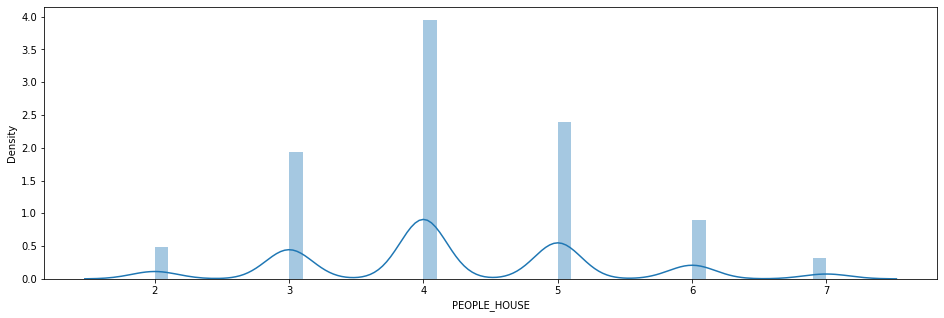

In [195]:
plt.figure(figsize=(16,5))
sns.distplot(data['PEOPLE_HOUSE'])
plt.show()

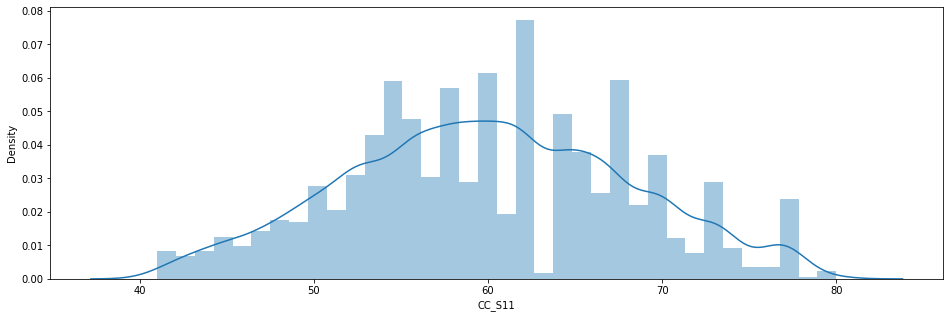

In [196]:
plt.figure(figsize=(16,5))
sns.distplot(data['CC_S11'])
plt.show()

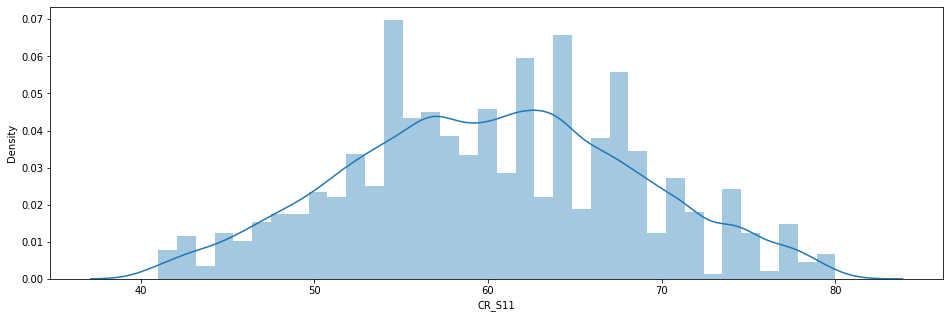

In [197]:
plt.figure(figsize=(16,5))
sns.distplot(data['CR_S11'])
plt.show()

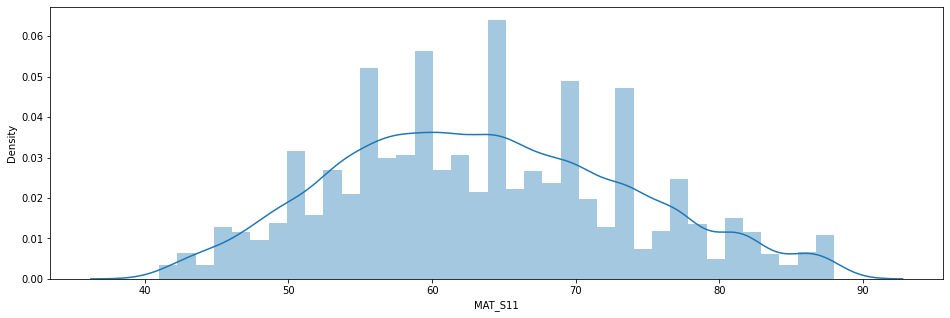

In [198]:
plt.figure(figsize=(16,5))
sns.distplot(data['MAT_S11'])
plt.show()

In [199]:
### PEOPLE_HOUSE does not have a bell shape 

In [200]:
from numpy import exp
data['PEOPLE_HOUSE'] = exp(data['PEOPLE_HOUSE'])

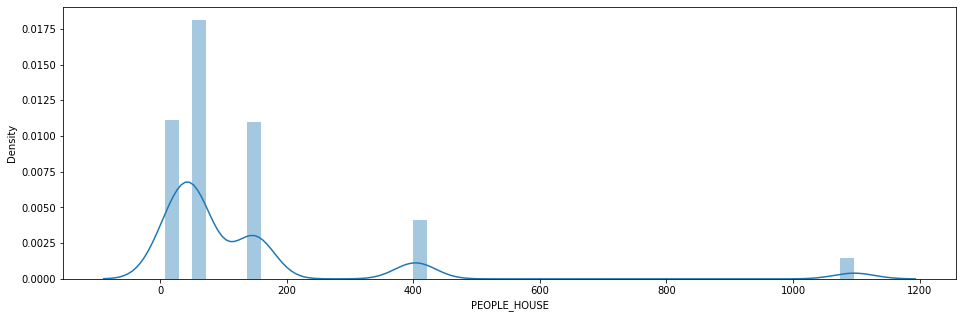

In [201]:
plt.figure(figsize=(16,5))
sns.distplot(data['PEOPLE_HOUSE'])
plt.show()